[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/accdavlo/calcolo-scientifico/blob/main/codes/poisson_FD.ipynb)

# Poisson equation

In this notebook we will solve the 1D Poisson equation given by the equations
$$-\partial_{xx} u = f .$$

Let us start with an example on the domain $\Omega=[0,1]$ with $f=4\pi^2 \sin(2\pi x)$ and homogeneous Dirichlet BC $u(0)=u(1)=0$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Geometry
x_left =0.
x_right = 1.
Nx = 100


xx = np.linspace(0, 1, Nx) ## Define a linspace with Nx points

dx = xx[1]-xx[0]    # this is equivalent to h in our notes

## Solve the equation with finite differences
$$ - \frac{u_{i-1}-2u_i + u_{i+1}}{\Delta x^2} = f(x_i)$$

This leads to the linear system

$$ -\frac{1}{\Delta x ^2}\begin{pmatrix}
-2 & 1 & 0 & \dots &0\\
1 & -2 & 1 & \dots &\vdots\\
\vdots & \ddots & \ddots & \ddots &\vdots&\\
0 & \dots &1 &-2&1\\
0 & \dots &0 &1&-2
\end{pmatrix}  \begin{pmatrix} u_{0} \\ \vdots \\u_{N-1} \end{pmatrix} =\begin{pmatrix} f(x_{0}) \\ \vdots \\ f(x_{N-1}) \end{pmatrix} $$

### How to impose Dirichlet boundary conditions?
We want $u(x_0) \stackrel{!}{=} u_L$. We can change the linear system for the first equation to impose such constraint, so that the first equation becomes $u_0 = u_L$.
The first line of the matrix becomes $A_{0,:} = \begin{pmatrix} 1 & 0 & \dots & 0 \end{pmatrix}$ and the right hand side $f_0 = u_L$.

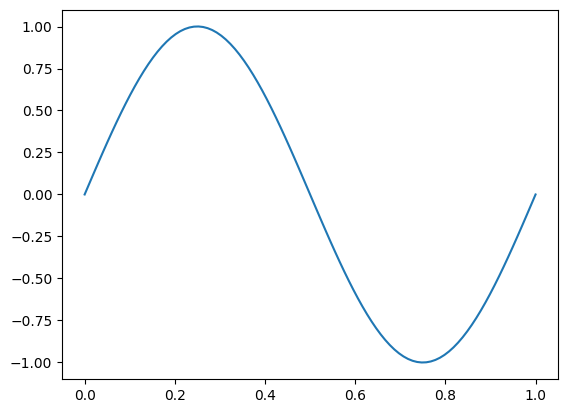

In [5]:
# Finite difference problem
f_lambda = lambda x: 4*np.pi**2 * np.sin(2*np.pi*x)

# Compose the left hand side and right hand side
A = np.zeros((Nx,Nx))
f = np.zeros(Nx)

for i in range(0,Nx-1):
    # Fill the matrix and the right hand side
    A[i,i-1] = -1/dx**2
    A[i,i]   = 2/dx**2
    A[i,i+1] = -1/dx**2
    f[i]     = f_lambda(xx[i])

# Boundary conditions

# QUESTION: WHY ARE WE SETTING ENTIRE ROWS TO 0?
# Homogeneous Dirichlet in x_left
A[0, :] = 0.
A[0,0] = 1.
f[0]   = 0.

# Homogeneous Dirichlet in x_right
A[-1,:] = 0.
A[-1,-1] = 1.
f[-1]   = 0.


### FILL IN THE Linear solution of the system
u = np.linalg.solve(A, f)
plt.figure()
plt.plot

plt.plot(xx, u)

## Check order of accuracy
If $\Delta x \to 0$ then $e^{\Delta x}=\lVert u^{\Delta x} - u^{ex} \rVert \to 0$. How does it go to zero?

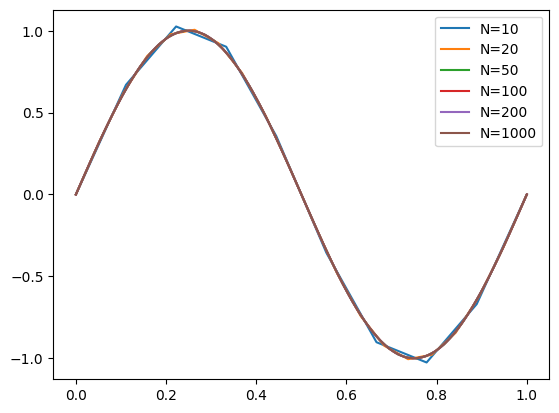

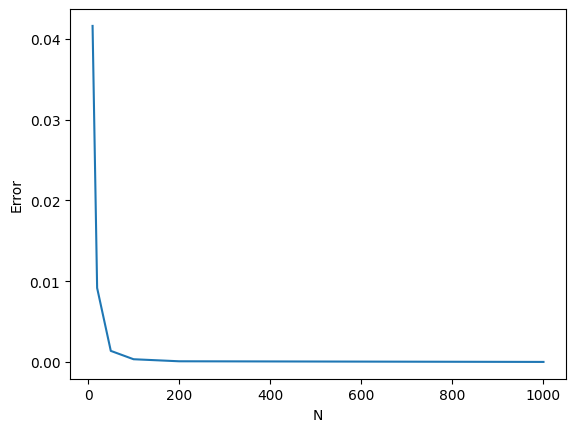

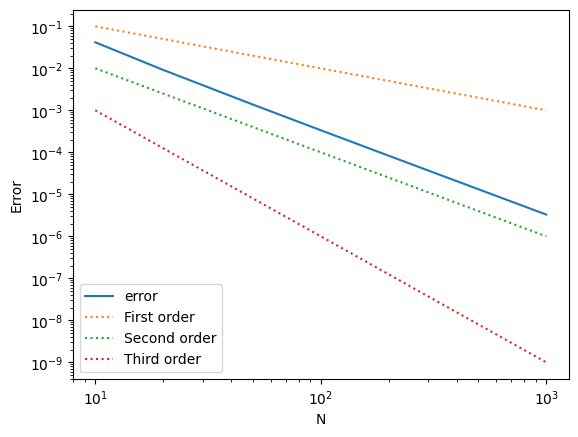

In [6]:
# PUT WHAT WE DID BEFORE INTO A FUNCTION THAT DEPENDS ON THE NUMBER OF NODES!

def solution(Nx):
    # Geometry
    x_left = 0.
    x_right = 1.

    xx = np.linspace(0, 1, Nx) ## Define a linspace with Nx points

    dx = xx[1]-xx[0]    # this is equivalent to h in our notes

    # COMPUTE THE APPROXIMATE SOLUTION
    # Finite difference problem
    f_lambda = lambda x: 4*np.pi**2 * np.sin(2*np.pi*x)

    # Compose the left hand side and right hand side
    A = np.zeros((Nx,Nx))
    f = np.zeros(Nx)

    for i in range(0,Nx-1):
        # Fill the matrix and the right hand side
        A[i,i-1] = -1/dx**2
        A[i,i]   = 2/dx**2
        A[i,i+1] = -1/dx**2
        f[i]     = f_lambda(xx[i])

    # Boundary conditions

    # QUESTION: WHY ARE WE SETTING ENTIRE ROWS TO 0?
    # Homogeneous Dirichlet in x_left
    A[0, :] = 0.
    A[0,0] = 1.
    f[0]   = 0.

    # Homogeneous Dirichlet in x_right
    A[-1,:] = 0.
    A[-1,-1] = 1.
    f[-1]   = 0.

    ### FILL IN THE Linear solution of the system
    u = np.linalg.solve(A, f)

    # Compute the exact solution
    u_ex = np.sin(2.*np.pi*xx)

    # Compute the relative error in L2 norm
    error = np.linalg.norm(u-u_ex)/np.linalg.norm(u_ex)

    return xx, u, error

## TEST THE SOLUTION FOR DIFFERENT NUMBER OF NODES

Ns = [10,20,50,100,200,1000]
errors = np.zeros(len(Ns))

plt.figure()
for iN, N in enumerate(Ns):
    xx, u, error = solution(N)
    plt.plot(xx,u, label=f"N={N}")

    errors[iN] = error

plt.legend()

# the following plot is unintellegible!
plt.figure()
plt.plot(Ns, errors)
plt.xlabel("N")
plt.ylabel("Error")

# e = h^p, where p is the order of accuracy of our method.
# this means it is much more useful to look at its log-log plot:
# log(e) = log(h^p) = p * log(h) = -plog(N)
# by using the h = 1/N relation.

plt.figure()
plt.loglog(Ns, errors, label="error")
plt.loglog(Ns,1./np.array(Ns), ":",label="First order")
plt.loglog(Ns,1./np.array(Ns)**2, ":", label="Second order")
plt.loglog(Ns,1./np.array(Ns)**3, ":", label="Third order")
plt.xlabel("N")
plt.ylabel("Error")
plt.legend()

we can see that the error bar is parallel to second order. this happens because it is a second-order method!

## Non-homogeneous Dirichlet BC

1. Take $u^{ex} (x) = x^3-2x^2+1$ on $\Omega=[0,1]$, so $-\Delta u = -6x+4=:f(x)$, $u_L = 1$ and $u_R= 0$.
2. Take $u^{ex} (x) = \cos(x)-x$ on $\Omega=[0,2\pi]$, so $-\Delta u = \cos(x)=:f(x)$, $u_L = 1$ and $u_R= 1-2\pi$.


1.7884645745776538e-16
0.013013322637682947


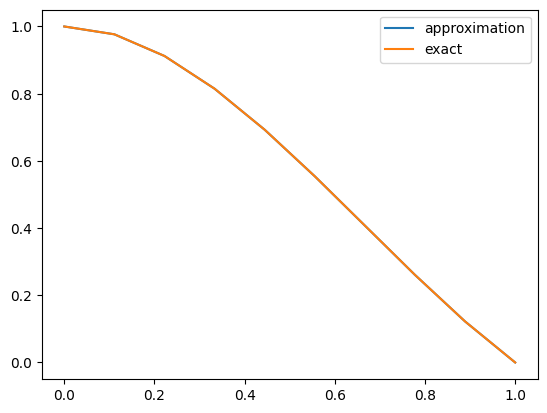

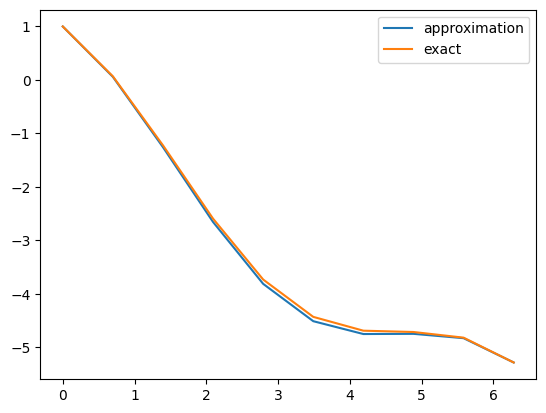

In [9]:
def solution(Nx, x_left,x_right, uL, uR, f_lambda, uex_lambda):

    xx = np.linspace(x_left, x_right, Nx) ## Define a linspace with Nx points

    dx = xx[1]-xx[0]    # this is equivalent to h in our notes

    # COMPUTE THE APPROXIMATE SOLUTION
    # Finite difference problem

    # Compose the left hand side and right hand side
    A = np.zeros((Nx,Nx))
    f = np.zeros(Nx)

    for i in range(0,Nx-1):
        # Fill the matrix and the right hand side
        A[i,i-1] = -1/dx**2
        A[i,i]   = 2/dx**2
        A[i,i+1] = -1/dx**2
        f[i]     = f_lambda(xx[i])


    # Boundary conditions

    # Homogeneous Dirichlet in x_left
    A[0,:] = 0
    A[0,0] = 1
    f[0]   = uL

    # Homogeneous Dirichlet in x_right
    A[-1,:]  = 0
    A[-1,-1] = 1
    f[-1]    = uR

    u = np.linalg.solve(A,f)

    u_ex = uex_lambda(xx)

    error = np.linalg.norm(u-u_ex)/np.linalg.norm(u_ex)

    return xx, u, error

uex_lambda = lambda x:x**3-2*x**2+1
f_lambda = lambda x: -6*x+4
x_left = 0.
x_right = 1.
uL=1.
uR=0.
Nx = 10

plt.figure()
xx,uu,error = solution(Nx, x_left,x_right, uL, uR, f_lambda, uex_lambda)
plt.plot(xx,uu,label="approximation")
plt.plot(xx,uex_lambda(xx),label="exact")
plt.legend()
print(error)

uex_lambda = lambda x: np.cos(x)-x
f_lambda = lambda x: np.cos(x)
x_left = 0.
x_right = 2*np.pi
uL=1.
uR=1-2*np.pi
Nx = 10

plt.figure()
xx,uu,error = solution(Nx, x_left,x_right, uL, uR, f_lambda, uex_lambda)
plt.plot(xx,uu,label="approximation")
plt.plot(xx,uex_lambda(xx),label="exact")
plt.legend()
print(error)

## Neumann boundary conditions
We want to impose at the boundary that
$\partial_x u(x_L) = g_L$,
which in a discrete sense becomes
$$
\frac{u_1-u_0 }{\Delta x} = g_L.
$$
In the matrix this correspond to the first line of the system to be
$$
A_{0,:}=\begin{pmatrix}
-\frac{1}{\Delta x} & \frac{1}{\Delta x} & 0 &\dots &0
\end{pmatrix},\qquad f_0 = g_L.
$$

## Classes
Let's introduce some classes to deal with all the ingredients

In [14]:
class Geometry1D:
    def __init__(self, x_left, x_right, N=None):
        self.x_left = x_left
        self.x_right = x_right
        if N is not None:
            self.set_N(N)

    def set_N(self,N):
        self.N = N
        self.xx = np.linspace(self.x_left,self.x_right, N)
        self.dx = self.xx[1]-self.xx[0]

geom = Geometry1D(0.,1.,N=10)

boundary = dict()
boundary["left"] = ["dirichlet", 0.]
boundary["right"] = ["dirichlet", 1.]

class PoissonProblem1D:
    def __init__(self, geometry, boundary, f_lambda):
        self.geometry = geometry
        self.boundary = boundary
        self.f_lambda = f_lambda

    def set_exact_solution(self, uex_lambda):
        self.uex_lambda = uex_lambda

    def assemble_matrix(self):
        ## ASSEMBLE THE MATRIX AND RHS
        # Compose the left hand side and right hand side
        self.A = np.zeros((self.geometry.N,self.geometry.N))
        self.f = np.zeros(self.geometry.N)

        for i in range(0,self.geometry.N-1):
            # Fill the matrix and the right hand side
            self.A[i,i-1] = -1/self.geometry.dx**2
            self.A[i,i]   = 2/self.geometry.dx**2
            self.A[i,i+1] = -1/self.geometry.dx**2
            self.f[i]     = self.f_lambda(self.geometry.xx[i])

        # CHANGE MATRIX AND RHS FOR BC!
        self.apply_BC()

    def apply_BC(self, boundary=None):
        # Boundary conditions

        if boundary is not None:
            self.boundary = boundary
        if not hasattr(self,"boundary"):
            raise ValueError("Boundaries are not set yet")

        if self.boundary["left"][0]=="dirichlet":
            # Homogeneous Dirichlet in x_left
            self.A[0,:] = 0.
            self.A[0,0] = 1.
            self.f[0]   = self.boundary["left"][1]

        elif self.boundary["left"][0]=="neumann":
            # Homogeneous Dirichlet in x_left
            self.A[0,:] = 0.
            self.A[0,0] = -1./self.geometry.dx
            self.A[0,1] =  1./self.geometry.dx
            self.f[0]   = self.boundary["left"][1]
        else:
            raise ValueError("Boundary %s not implemented"%(self.boundary["left"][0]))

        if self.boundary["right"][0]=="dirichlet":
            # Homogeneous Dirichlet in x_right
            self.A[-1,:] = 0.
            self.A[-1,-1] = 1.
            self.f[-1]   = self.boundary["right"][1]

        elif self.boundary["right"][0]=="neumann":
            # Homogeneous Dirichlet in x_right
            self.A[-1,:] = 0.
            # First order
            self.A[-1,-2] = -1./self.geometry.dx
            self.A[-1,-1] =  1./self.geometry.dx

            # # Second order
            # self.A[-1,-3] = 1./2./self.geometry.dx
            # self.A[-1,-2] = -2./self.geometry.dx
            # self.A[-1,-1] =  3./2./self.geometry.dx

            self.f[-1]   = self.boundary["right"][1]

    def solve(self, N=None):

        if N is not None:
            # Change geometry and assemble matrix
            self.geometry.set_N(N)
            self.assemble_matrix()
        if not hasattr(self,"A") or not hasattr(self,"f"):
            # Assemble matrix
            self.assemble_matrix()

        # Solve the system
        self.uu = np.linalg.solve(self.A, self.f)

        # If there's the exact solution compute the error
        if hasattr(self,"uex_lambda"):
            uex = uex_lambda(self.geometry.xx)
            self.error = np.linalg.norm(self.uu-uex)/np.linalg.norm(uex)
        else:
            self.error = np.nan
        return self.geometry, self.uu, self.error

0.0030880979586494035


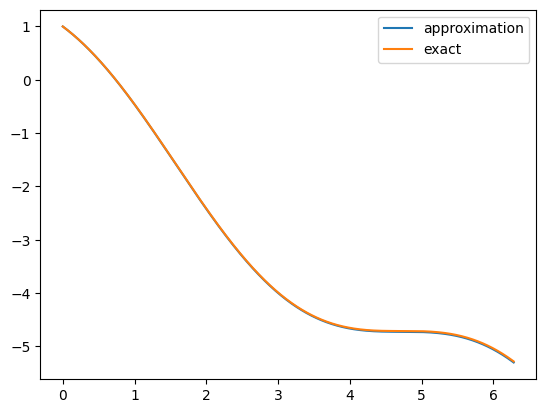

In [15]:
geom = Geometry1D(0.,2*np.pi,N=1000)

boundary = dict()
boundary["left"] = ["dirichlet", 1.]
# boundary["right"] = ["dirichlet", 1.-2*np.pi]
boundary["right"] = ["neumann", -1.]

uex_lambda = lambda x: np.cos(x)-x
f_lambda = lambda x: np.cos(x)

problem = PoissonProblem1D(geom, boundary, f_lambda)
problem.set_exact_solution(uex_lambda)

plt.figure()
geom,uu,error = problem.solve()
plt.plot(geom.xx,uu,label="approximation")
plt.plot(geom.xx,uex_lambda(geom.xx),label="exact")
plt.legend()
print(error)

In [ ]:
class ConvergenceAnalysis:
    def __init__(self, problem, Ns=None):
        self.problem = problem
        if Ns is None:
            self.Ns = np.int64(2**np.linspace(3,10,8))
        else:
            self.Ns = Ns
        self.Ns = np.array(self.Ns)

    def analyse(self):
        self.errors = np.zeros(len(self.Ns))
        self.orders = np.zeros(len(self.Ns)-1)

        for iN, N in enumerate(self.Ns):
            ## SOLVE THE PROBLEM AND COMPUTE THE ERROR
            _, _, self.errors[iN] = self.problem.solve(N)
            if iN>0:
                self.orders[iN-1] = np.log(self.errors[iN]/self.errors[iN-1])/np.log(self.Ns[iN-1]/self.Ns[iN])

    def plot_error_convergence(self):
        if not hasattr(self,"errors"):
            # If not already computed, computes the errors
            self.analyse()

        fig, ax = plt.subplots(1,1)

        # Plot error vs N in loglog scale!
        ax.loglog(self.Ns, self.errors, label ="errors")

        # Estimation of the order and plot of the reference lines
        average_order = np.mean(self.orders)
        order_plus = np.ceil(average_order)
        order_minus = np.floor(average_order)
        ax.loglog(self.Ns, (self.Ns/self.Ns[0])**(-order_plus)*self.errors[0],"--", label =f"order {order_plus}")
        ax.loglog(self.Ns, (self.Ns/self.Ns[0])**(-order_minus)*self.errors[0],"--", label =f"order {order_minus}")
        ax.set_xlabel("Number of points in mesh")
        ax.set_ylabel("Relative error")
        plt.legend()



In [ ]:
convergence = ConvergenceAnalysis(problem)
convergence.plot_error_convergence()

In [ ]:
# Play with BC and their discretizations

geom = Geometry1D(0.,2*np.pi,N=1000)

boundary = dict()
boundary["left"] = ["dirichlet", 1.]
boundary["right"] = ["dirichlet", 1.-2*np.pi]
# boundary["right"] = ["neumann", -1.]

uex_lambda = lambda x: np.cos(x)-x
f_lambda = lambda x: np.cos(x)

problem = PoissonProblem1D(geom, boundary, f_lambda)
problem.set_exact_solution(uex_lambda)


convergence = ConvergenceAnalysis(problem)
convergence.plot_error_convergence()

## Higher order discretization
We can use a 5-point stencil to discretize the Laplacian operator. The stencil is given by
$$
\begin{pmatrix}
u'' \approx -1/12U_{-2} +4/3u_{-1}	-5/2u_0	+4/3u_1-1/12u_2
\end{pmatrix}
$$
which is a 4th order discretization of the Laplacian operator.

Problem: what do we do at the boundaries?

One sided stencil (I take high order ones for second derivatives):
Use the calculator of FD [https://web.media.mit.edu/~crtaylor/calculator](https://web.media.mit.edu/~crtaylor/calculator)

the right-sided
$$
u'' = \frac{10u_{i-1}-15u_{i+0}-4u_{i+1}+14u_{i+2}-6u_{i+3}+1u_{i+4}}{12h^2}
$$
and the left-sided
$$
u''\approx \frac{1u_{i-4}-6u_{i-3}+14u_{i-2}-4u_{i-1}-15u_{i+0}+10u_{i+1}}{12 h^2}
$$




In [ ]:
# Make the high order version of the FD class
class PoissonProblem1D:
    ??????

In [ ]:
geom = Geometry1D(0.,2*np.pi,N=1000)

boundary = dict()
boundary["left"] = ["dirichlet", 1.]
boundary["right"] = ["dirichlet", 1.-2*np.pi]
# boundary["right"] = ["neumann", -1.]

uex_lambda = lambda x: np.cos(x)-x
f_lambda = lambda x: np.cos(x)

problem = PoissonProblem1D(geom, boundary, f_lambda)
problem.set_exact_solution(uex_lambda)

geom,uu,error = problem.solve(10)

plt.plot(geom.xx,uu)
plt.plot(geom.xx,uex_lambda(geom.xx))
convergence = ConvergenceAnalysis(problem)
convergence.plot_error_convergence()

## 2D Poisson equation

Stencil is now in 2D
$$
-\Delta u_{0,0} \approx \frac{-u_{-1,0}+2u_{0,0}-u_{1,0}}{\Delta x^2} + \frac{-u_{0,-1}+2u_{0,0}-u_{0,1}}{\Delta y^2}
$$

we need to find a way to store the 2D array in a 1D array. We can use the row-major order, which is the default in C and Python. The 2D array is stored in a 1D array by stacking the rows one after the other.

In [ ]:
A = np.arange(66).reshape(11,6)
print(A)
A2 = A.reshape(-1)
print(A2)

This means that the element $u_{i,j}$ is stored in the 1D array as $u_{i*NC+j}$, where $NC$ is the number of columns.

In [ ]:
class Geometry2D:
    def __init__(self, x_left, x_right, y_bottom, y_top, Nx=None, Ny=None):
        self.x_left = x_left
        self.x_right = x_right
        self.y_bottom = y_bottom
        self.y_top = y_top
        if Nx is not None and Ny is not None:
            self.set_Ns(Nx,Ny)
        elif Nx is not None:
            self.set_Ns(Nx,Nx)

    def set_Ns(self,Nx,Ny):
        self.Nx = Nx
        self.Ny = Ny
        self.xx = np.linspace(self.x_left,self.x_right, self.Nx)
        self.yy = np.linspace(self.y_bottom,self.y_top, self.Ny)
        self.dx = self.xx[1]-self.xx[0]
        self.dy = self.yy[1]-self.yy[0]

        self.XX, self.YY = np.meshgrid(self.xx, self.yy, indexing="ij")

    def map_1D_to_2D(self, alpha):
        return alpha%self.Nx, alpha//self.Nx
    def map_2D_to_1D(self, i,j):
        return i*self.Ny+j

In [ ]:
geom2D = Geometry2D(0.,1.,0.,1.,Nx=11,Ny=6)
print(geom2D.XX)
print(geom2D.YY)

$$
-\Delta u_{\alpha} \approx \frac{-u_{\alpha-N_y}+2u_{\alpha}-u_{\alpha+N_y}}{\Delta x^2} + \frac{-u_{\alpha-1}+2u_{\alpha}-u_{\alpha+1}}{\Delta y^2}
$$

In [ ]:
boundary = dict()
boundary["left"] = ["dirichlet",  lambda x: np.cos(x[0])-np.sin(x[1])]
boundary["right"] = ["dirichlet", lambda x: np.cos(x[0])-np.sin(x[1])]
boundary["top"] = ["dirichlet", lambda x: np.cos(x[0])-np.sin(x[1])]
boundary["bottom"] = ["dirichlet", lambda x: np.cos(x[0])-np.sin(x[1])]

uex_lambda = lambda x: np.cos(x[0])-np.sin(x[1])
f_lambda = lambda x: np.cos(x[0])-np.sin(x[1])


In [ ]:
class PoissonProblem2D:
    def __init__(self, geometry, boundary, f_lambda):
        self.geometry = geometry
        self.boundary = boundary
        self.f_lambda = f_lambda

    def set_exact_solution(self, uex_lambda):
        self.uex_lambda = uex_lambda
    def assemble_matrix(self):
        Nx = self.geometry.Nx
        Ny = self.geometry.Ny
        self.N = Nx*Ny
        dx = self.geometry.dx
        dy = self.geometry.dy

        self.A = np.zeros((self.N,self.N))
        self.f = np.zeros(self.N)

        for i in range(1,Nx-1):
            for j in range(1,Ny-1):
                alpha = geom2D.map_2D_to_1D(i,j)

                self.A[alpha,alpha-Ny] = ??????
                self.A[alpha,alpha   ]+= ??????
                self.A[alpha,alpha+Ny] = ??????
                self.A[alpha,alpha-1 ] = ??????
                self.A[alpha,alpha   ]+= ??????
                self.A[alpha,alpha+1 ] = ??????
                self.f[alpha]     = self.f_lambda(np.array([self.geometry.XX[i,j],self.geometry.YY[i,j]]))

        self.apply_BC()

    def apply_BC(self, boundary=None):
        # Boundary conditions

        if boundary is not None:
            self.boundary = boundary
        if not hasattr(self,"boundary"):
            raise ValueError("Boundaries are not set yet")

        if self.boundary["left"][0]=="dirichlet":
            # Dirichlet in x_left
            for j in range(self.geometry.Ny):
                alpha = self.geometry.map_2D_to_1D(0,j)
                self.A[alpha,:] = 0.
                self.A[alpha,alpha] = 1.
                self.f[alpha] = self.boundary["left"][1](np.array([self.geometry.XX[0,j],self.geometry.YY[0,j]]))

        elif self.boundary["left"][0]=="neumann":
            # Neumann in x_left
            for j in range(self.geometry.Ny):
                alpha = self.geometry.map_2D_to_1D(0,j)
                alpha1= self.geometry.map_2D_to_1D(1,j)
                self.A[alpha,:] = 0.
                self.A[alpha,alpha] = -1./self.geometry.dx
                self.A[alpha,alpha1] = 1./self.geometry.dx
                self.f[alpha] = self.boundary["left"][1](np.array([self.geometry.XX[0,j],self.geometry.YY[0,j]]))
        else:
            raise ValueError("Boundary %s not implemented"%(self.boundary["left"][0]))

        if self.boundary["right"][0]=="dirichlet":
            # Dirichlet in x_right
            ?????

        elif self.boundary["right"][0]=="neumann":
            ?????
        else:
            raise ValueError("Boundary %s not implemented"%(self.boundary["right"][0]))

        if self.boundary["top"][0]=="dirichlet":
            ?????
        elif self.boundary["top"][0]=="neumann":
            ?????
        else:
            raise ValueError("Boundary %s not implemented"%(self.boundary["top"][0]))

        if self.boundary["bottom"][0]=="dirichlet":
            ?????
        elif self.boundary["bottom"][0]=="neumann":
            ?????
        else:
            raise ValueError("Boundary %s not implemented"%(self.boundary["bottom"][0]))

    def solve(self, Nx=None, Ny=None):
        if Nx is not None:
            if Ny is None:
                Ny = Nx
            self.geometry.set_Ns(Nx,Ny)
            self.assemble_matrix()
        if not hasattr(self,"A") or not hasattr(self,"f"):
            self.assemble_matrix()
        self.uu = np.linalg.solve(self.A, self.f)
        if hasattr(self,"uex_lambda"):
            self.uex = uex_lambda(np.array([self.geometry.XX.reshape(-1),self.geometry.YY.reshape(-1)]))
            self.error = np.linalg.norm(self.uu-self.uex)/np.linalg.norm(self.uex)
        else:
            self.error = np.nan
        return self.geometry, self.uu, self.error

In [ ]:
poisson2D = PoissonProblem2D(geom2D, boundary, f_lambda)
poisson2D.set_exact_solution(uex_lambda)

geom2D, uu,error = poisson2D.solve()

In [ ]:
plt.figure()
plt.contourf(geom2D.XX,geom2D.YY,uu.reshape(geom2D.XX.shape))
plt.colorbar()

plt.figure()
plt.contourf(geom2D.XX,geom2D.YY,poisson2D.uex.reshape(geom2D.XX.shape))
plt.colorbar()

plt.figure()
plt.contourf(geom2D.XX,geom2D.YY,(poisson2D.uex-uu).reshape(geom2D.XX.shape))
plt.colorbar()

print(error)


In [ ]:
# Try with different number of points until something large (eg 256x256)

import time
t0 = time.time()
geom2D, uu,error = poisson2D.solve(256,256)
computational_time = time.time()-t0
print("Time ",computational_time)
print("Error ",error)

In [ ]:
plt.spy(poisson2D.A)

## Larger problems and sparsity patterns


### Sparse matrices
The matrix is sparse, i.e. most of the entries are zero. We can use sparse matrices to store the matrix and solve the linear system. We can use the `scipy.sparse` module to store the matrix and solve the linear system.

There are different formats that can store sparse matrices:
- `csc_matrix` (Compressed Sparse Column)
- `csr_matrix` (Compressed Sparse Row)
- `lil_matrix` (List of Lists)

The `csc_matrix` is more efficient for column operations, while the `csr_matrix` is more efficient for row operations. The `lil_matrix` is more efficient for constructing the matrix.

We can convert between the formats using the `tocsc()`, `tocsr()`, and `tolil()` methods (Thanks scipy!).

And use other routines to set diagonals as in `diags()`.

Moreover, there is a sparse solver `scipy.sparse.linalg.spsolve` that can be used to solve the linear system.

### `csr_matrix`
The `csr_matrix` is a sparse matrix format that stores the matrix in compressed row format. The matrix is stored as three arrays:
- `data` stores the non-zero entries of the matrix
- `indices` stores the column indices of the non-zero entries
- `indptr` stores the indices of the start of each row in the `data` and `indices` arrays

#### Example
Consider the matrix
$$
\begin{pmatrix}
1 & 0 & 2\\
0 & 3 & 0\\
4 & 0 & 5
\end{pmatrix}
$$
It can be saved in the following `csr_matrix`

|Vector  |Values             | Length           |
|:--------|:-----------------|:-----------------|
|`data   `| `[1, 2, 3, 4, 5]`| `nnz`            |
|`indices`| `[0, 2, 1, 0, 2]`| `nnz`            |
|`indptr `| `[0, 2, 3, 5]`   | `rows+1`         |

where `nnz` is the number of non-zero entries and `rows` is the number of rows.

### `csc_matrix`
Is the same as `csr_matrix` but the matrix is stored it works with columns instead of rows.

### `lil_matrix`
The `lil_matrix` is a sparse matrix format that stores the matrix as a list of lists. The matrix is stored as two lists of lists:
- `data` stores the non-zero entries of the matrix as a list of lists
- `rows` stores the row indices of the non-zero entries as a list of lists

In [ ]:
import scipy.sparse as sp

# Example
A = np.array([[1,0,2],[0,3,0],[0,0,0],[4,0,5],[6,7,8]])
A_csr = sp.csr_matrix(A)
print("data    ",A_csr.data)
print("indices ",A_csr.indices)
print("indptr  ",A_csr.indptr)
print(A)

In [ ]:
lil_A = A_csr.tolil()
print("data ",lil_A.data)
print("rows ",lil_A.rows)

In [ ]:
A_csc = A_csr.tocsc()
print("data    ",A_csc.data)
print("indices ",A_csc.indices)
print("indptr  ",A_csc.indptr)
print(A)

In [ ]:

def put_zero_row_in_csr(A, i):
    A.data[A.indptr[i]:A.indptr[i+1]] = 0


print(A_csr.toarray())
put_zero_row_in_csr(A_csr,0)
print(A_csr.toarray())


In [ ]:
class PoissonProblem2D:
    def __init__(self, geometry, boundary, f_lambda):
        self.geometry = geometry
        self.boundary = boundary
        self.f_lambda = f_lambda

    def set_exact_solution(self, uex_lambda):
        self.uex_lambda = uex_lambda
    def assemble_matrix(self):
        Nx = self.geometry.Nx
        Ny = self.geometry.Ny
        self.N = Nx*Ny
        dx = self.geometry.dx
        dy = self.geometry.dy

        self.f = np.zeros(self.N)

        main_diag = np.ones(self.N)*(2/dx**2+2/dy**2)
        off_diag_x = np.ones(self.N-Ny)*(-1/dx**2)
        off_diag_y = np.ones(self.N-1)*(-1/dy**2)

        # SPARSE IMPLEMENTATION OF THE MATRIX
        self.A = sp.diags([main_diag, off_diag_x, off_diag_x, off_diag_y, off_diag_y],\
                           [0, -Ny, Ny, -1, 1], shape=(self.N,self.N), format="csr")

        # for i in range(1,Nx-1):
        #     for j in range(1,Ny-1):
        #         alpha = geom2D.map_2D_to_1D(i,j)

        #         self.A[alpha,alpha-Ny] =  -1./dx**2
        #         self.A[alpha,alpha  ]+=   2./dx**2
        #         self.A[alpha,alpha+Ny] =  -1./dx**2
        #         self.A[alpha,alpha-1] =  -1./dy**2
        #         self.A[alpha,alpha   ]+=   2./dy**2
        #         self.A[alpha,alpha+1] =  -1./dy**2
        #         self.f[alpha]     = self.f_lambda(np.array([self.geometry.XX[i,j],self.geometry.YY[i,j]]))

        # VECTORIZED IMPLEMENTATION OF f
        self.f = self.f_lambda(np.array([self.geometry.XX.reshape(-1),self.geometry.YY.reshape(-1)]))

        self.apply_BC()

    def apply_BC(self, boundary=None):
        # Boundary conditions with sparse implementation!!!

        if boundary is not None:
            self.boundary = boundary
        if not hasattr(self,"boundary"):
            raise ValueError("Boundaries are not set yet")

        if self.boundary["left"][0]=="dirichlet":
            # Dirichlet in x_left
            for j in range(self.geometry.Ny):
                alpha = self.geometry.map_2D_to_1D(0,j)
                put_zero_row_in_csr(self.A,alpha)
                self.A[alpha,alpha] = 1.
                self.f[alpha] = self.boundary["left"][1](np.array([self.geometry.XX[0,j],self.geometry.YY[0,j]]))

        elif self.boundary["left"][0]=="neumann":
            # Neumann in x_left
            for j in range(self.geometry.Ny):
                alpha = self.geometry.map_2D_to_1D(0,j)
                alpha1= self.geometry.map_2D_to_1D(1,j)
                put_zero_row_in_csr(self.A,alpha)
                self.A[alpha,alpha] = -1./self.geometry.dx
                self.A[alpha,alpha1] = 1./self.geometry.dx
                self.f[alpha] = self.boundary["left"][1](np.array([self.geometry.XX[0,j],self.geometry.YY[0,j]]))
        else:
            raise ValueError("Boundary %s not implemented"%(self.boundary["left"][0]))

        ## ADD ALL OTHER BOUNDARIES!!!
        ?????

    def solve(self, Nx=None, Ny=None):
        if Nx is not None:
            if Ny is None:
                Ny = Nx
            self.geometry.set_Ns(Nx,Ny)
            self.assemble_matrix()
        if not hasattr(self,"A") or not hasattr(self,"f"):
            self.assemble_matrix()
        self.uu = sp.linalg.spsolve(self.A, self.f)
        if hasattr(self,"uex_lambda"):
            self.uex = uex_lambda(np.array([self.geometry.XX.reshape(-1),self.geometry.YY.reshape(-1)]))
            self.error = np.linalg.norm(self.uu-self.uex)/np.linalg.norm(self.uex)
        else:
            self.error = np.nan
        return self.geometry, self.uu, self.error

In [ ]:
# Try different dimensions!
poisson2D = PoissonProblem2D(geom2D, boundary, f_lambda)
poisson2D.set_exact_solution(uex_lambda)

t0 = time.time()
geom2D, uu,error = poisson2D.solve(10,10)
computational_time = time.time()-t0
print("Time ",computational_time)
print("Error ",error)

In [ ]:
plt.spy(poisson2D.A.toarray())
print(poisson2D.A.shape)
print(poisson2D.A.nnz)

In [ ]:
convergence = ConvergenceAnalysis(poisson2D, Ns=[10,20,40,80,160,320])

convergence.analyse()
convergence.plot_error_convergence()